In [5]:
######################## Assignment:Gramener Case Study to identify patterns which indicate if a person is likely to default, #################################   

In [6]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sns.set(style="ticks", color_codes=True)


In [7]:
import warnings
warnings.filterwarnings('ignore')

# Reading, Inspection & Cleaning

Import and read the database. Store it in a variable called loan.

In [8]:
loan=pandas.read_csv(r"C:/Users/Ranja/loan.csv", encoding = "ISO-8859-1")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
############### Metadata description ####################

### Description - The data given contains the information about past loan applicants and whether they ‘defaulted’ or not.###
### This dataset consists of 111 attributes/columns###
### This dataset consists of 39718 rows###
            
############### Metadata description ####################

In [10]:
loan.shape

(39717, 111)

In [11]:
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       

# Inspect Null values

In [12]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [13]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [14]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Drop unecessary columns

In [15]:
# Use the 'drop()' function to drop the unnecessary columns
#loan.dropna(axis=1, how="all",inplace=True)

In [16]:
#loan.shape

In [17]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mort_acc',
                  'mths_since_recent_bc',
                  'mths_since_recent_bc_dlq',
                  'mths_since_recent_inq',
                  'mths_since_recent_revol_delinq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_sats',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_120dpd_2m',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'pct_tl_nvr_dlq',
                  'percent_bc_gt_75',
                  'tot_hi_cred_lim'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN


In [18]:
loan.shape

(39717, 86)

In [19]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       6.19
emp_length                      2.71
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
loan_status                     0.00
pymnt_plan                      0.00
url                             0.00
desc                           32.58
purpose                         0.00
title                           0.03
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
i

In [20]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['tot_coll_amt',
                  'tot_cur_bal',
                  'open_acc_6m',
                  'open_il_6m',
                  'open_il_12m',
                  'open_il_24m',
                  'mths_since_rcnt_il',
                  'total_bal_il',
                  'il_util',
                  'open_rv_12m',
                  'open_rv_24m',
                  'max_bal_bc',
                  'all_util',
                  'total_rev_hi_lim',
                  'inq_fi',
                  'total_cu_tl',
                  'inq_last_12m',
                  'acc_open_past_24mths',
                  'avg_cur_bal',
                  'bc_open_to_buy',
                  'bc_util',
                  'mo_sin_old_il_acct',
                  'total_bal_ex_mort',
                  'total_bc_limit',
                  'total_il_high_credit_limit'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0


In [21]:
loan.shape

(39717, 61)

In [22]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [23]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 4 Columns with NA values###
loan = loan.drop(['mths_since_last_major_derog',
                  'annual_inc_joint',
                  'dti_joint',
                  'verification_status_joint'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [24]:
loan.shape

(39717, 57)

### Crosschecking the Excel sheet

In [25]:
loan.to_csv(r"C:\Users\Ranja\Downloads\loan_Check1.csv",sep='\t', encoding='utf-8')

###  Creating Simple countplots

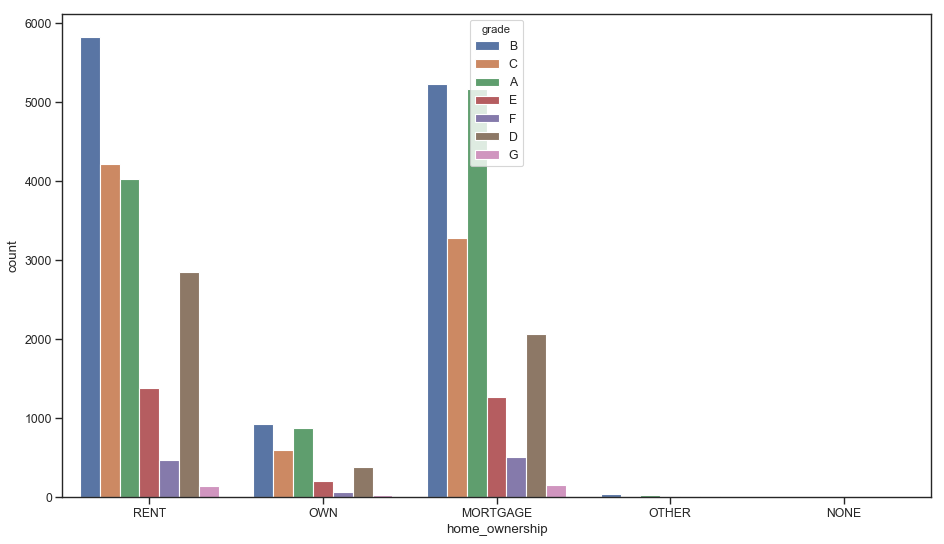

In [26]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "home_ownership", hue = "grade", data = loan)

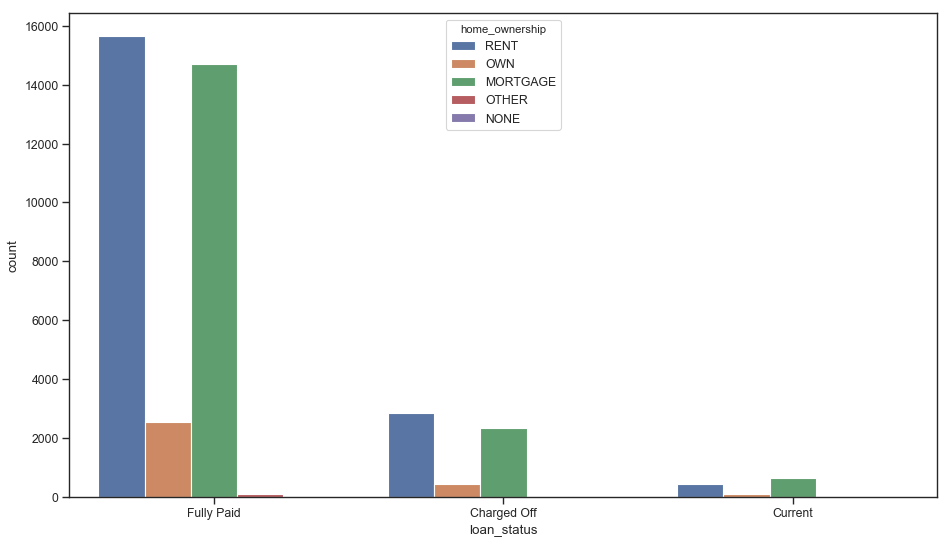

In [27]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "home_ownership", data = loan)

# Bucketing the salary bracket 

In [28]:
def salary_bracket(x):
    'divide the salary into following categories'
    if x < 300001:
        return "Bracket_1"
    elif 300001 <= x < 400001:
        return "Bracket_2"    
    elif 400001 <= x < 600001:
        return "Bracket_3"    
    elif 600001 <= x < 800001:
        return "Bracket_4"
    elif 800001 <= x < 1000001:
        return "Bracket_5"
    else:
        return "Bracket_6"

In [29]:
####Creating a new column with salary bracket indicator###

In [30]:
loan['Annual_Sal'] = loan.annual_inc.apply(lambda x: salary_bracket(x))

In [31]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,Bracket_1


In [32]:
loan.Annual_Sal.value_counts()

Bracket_1    39542
Bracket_2       83
Bracket_3       43
Bracket_4       27
Bracket_6       14
Bracket_5        8
Name: Annual_Sal, dtype: int64

In [33]:
####Plotting with annual_sal column###

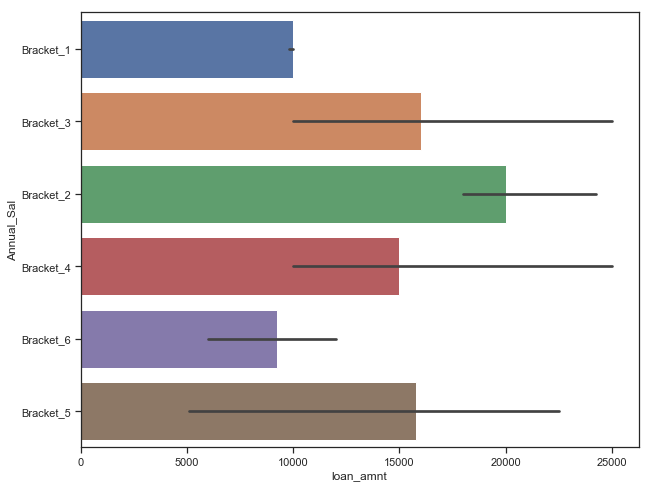

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Annual_Sal", data=loan, estimator=np.median)
plt.show()

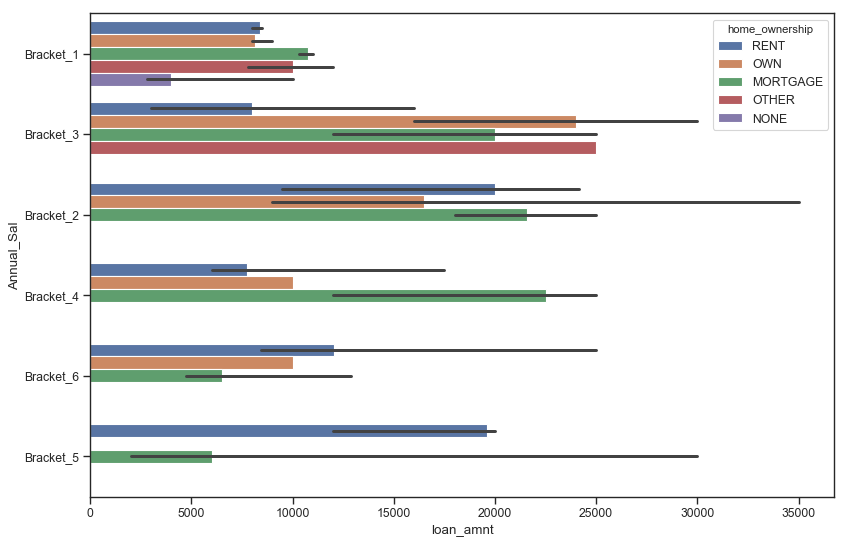

In [35]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='Annual_Sal', hue="home_ownership", data=loan, estimator=np.median)
plt.show()

# mentioned below is trial only for now

In [36]:
#home_on_rent = loan.loc[loan.home_ownership == 'RENT']
#home_on_rent

In [37]:
#home_own = loan.loc[loan.home_ownership == 'OWN']
#home_own

In [38]:
#home_mort = loan.loc[loan.home_ownership == 'MORTGAGE']
#home_mort

In [39]:
#home_other = loan.loc[loan.home_ownership == 'OTHER']
#home_other

In [40]:
#home_none = loan.loc[loan.home_ownership == 'NONE']
#home_none

In [41]:
#loan.groupby('home_ownership').loan_status.value_counts().unstack(0).plot.barh()

Text(0,0.5,'Count')

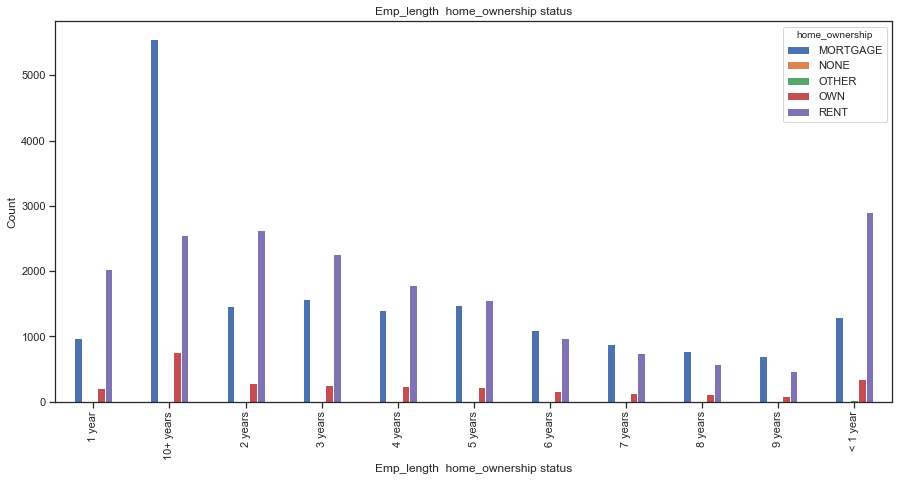

In [42]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['emp_length','home_ownership']).count()['id'].unstack().plot(ax=ax, kind='bar')
plt.title("Emp_length  home_ownership status")
plt.xlabel("Emp_length  home_ownership status")
plt.ylabel("Count")

Text(0,0.5,'Count')

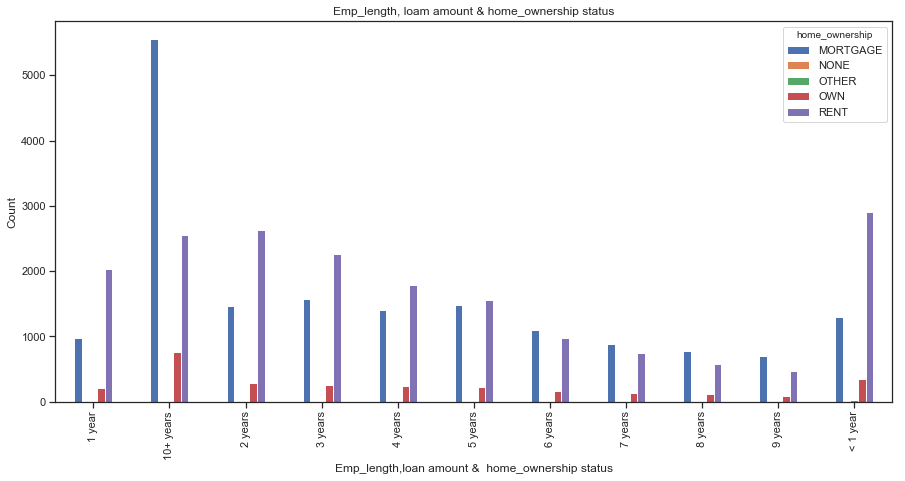

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['emp_length','home_ownership']).count()['loan_amnt'].unstack().plot(ax=ax, kind='bar')
plt.title("Emp_length, loam amount & home_ownership status")
plt.xlabel("Emp_length,loan amount &  home_ownership status")
plt.ylabel("Count")

Text(0,0.5,'Count')

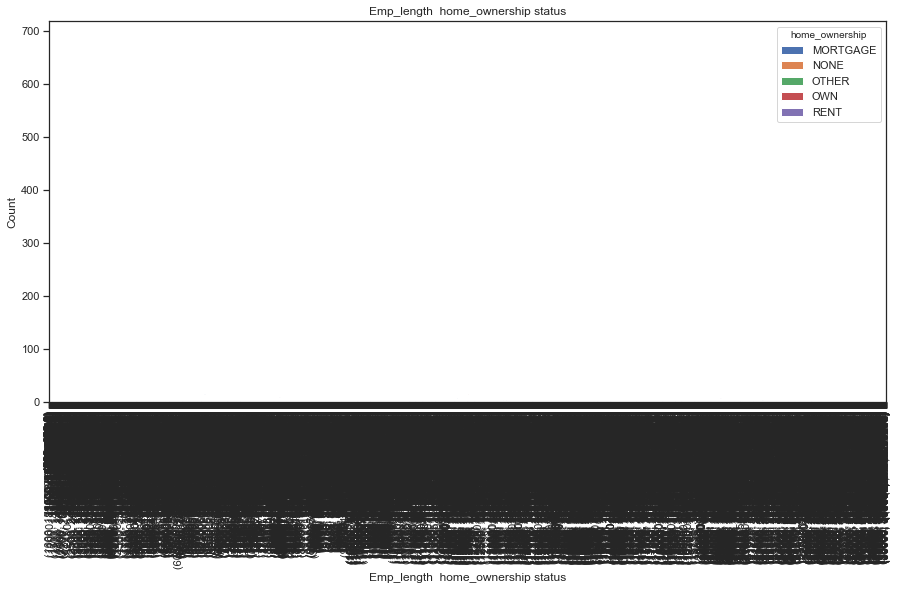

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['funded_amnt','funded_amnt_inv','home_ownership']).count()['id'].unstack().plot(ax=ax, kind='bar')
plt.title("Emp_length  home_ownership status")
plt.xlabel("Emp_length  home_ownership status")
plt.ylabel("Count")